In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [3]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [4]:
n=20
lam0=3
lam1=(1/np.mean(my_data)) #1/x_bar
sumx=np.sum(my_data)
test_stat=-2*log((lam0**n*e**(-lam0*sumx))/(lam1**n*e**(-lam1*sumx)))
print(test_stat)
print(1-stats.chi2.cdf(test_stat,1))

4.7192223601884615
0.029827229194775096


#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [5]:
crit=stats.chi2.ppf(0.95,1)
crit

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [6]:
data=[]
for i in np.arange(1000):
    sample=stats.expon.rvs(scale=1/5,size=20)
    lam0=3
    n=20
    sumx=np.sum(sample)
    lam1=1/np.mean(sample)
    ts=-2*log((lam0**n*e**(-lam0*sumx))/(lam1**n*e**(-lam1*sumx)))
    data=np.append(data,ts)

(array([297., 311., 224.,  97.,  45.,  19.,   5.,   1.,   0.,   1.]),
 array([3.83512464e-04, 2.82666411e+00, 5.65294470e+00, 8.47922529e+00,
        1.13055059e+01, 1.41317865e+01, 1.69580671e+01, 1.97843477e+01,
        2.26106283e+01, 2.54369089e+01, 2.82631895e+01]),
 <a list of 10 Patch objects>)

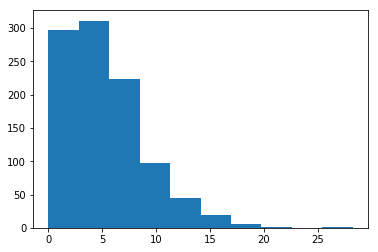

In [7]:
plt.hist(data)

In [8]:
print(np.mean(data))
print(np.mean(data>=crit))

5.215108991509243
0.578


Repeat for a sample size of 50. What do you expect to happen to power? 

In [9]:
data=[]
for i in np.arange(1000):
    sample=stats.expon.rvs(scale=1/5,size=50)
    lam0=3
    n=50
    sumx=np.sum(sample)
    lam1=1/np.mean(sample)
    ts=-2*log((lam0**n*e**(-lam0*sumx))/(lam1**n*e**(-lam1*sumx)))
    data=np.append(data,ts)

(array([ 69., 213., 318., 221., 106.,  46.,  18.,   6.,   2.,   1.]),
 array([ 0.39872561,  4.47682915,  8.55493269, 12.63303624, 16.71113978,
        20.78924332, 24.86734687, 28.94545041, 33.02355395, 37.10165749,
        41.17976104]),
 <a list of 10 Patch objects>)

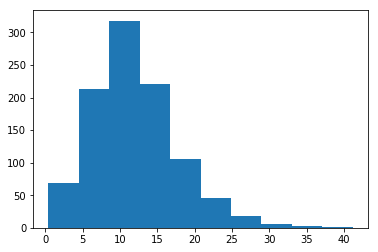

In [10]:
plt.hist(data)

In [11]:
print(np.mean(data))
print(np.mean(data>=crit))

11.971962672085557
0.949


### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

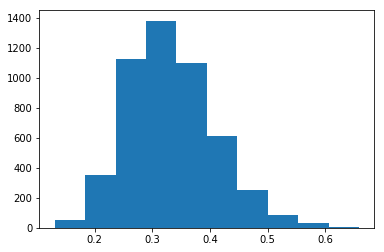

0.0404

In [12]:
n=20
test_statistic=[np.mean(stats.expon.rvs(scale=1/3,size=n)) for _ in np.arange(5000)]
np.mean(my_data)
plt.hist(test_statistic)
plt.show()
2*np.mean(test_statistic<=np.mean(my_data))

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [16]:
critical_bottow,critical_top=percentile([2.5,97.5],test_statistic)

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [17]:
power_test=[np.mean(stats.expon.rvs(scale=1/5,size=n)) for _ in np.arange(5000)]
np.mean(power_test>=critU) + np.mean(power_test<=critL)

0.5488

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

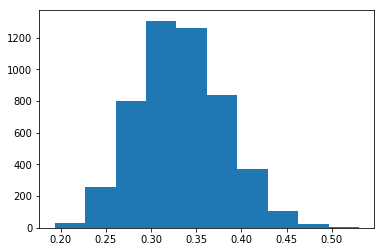

0.548

In [19]:
n=50
test_statistic=[np.mean(stats.expon.rvs(scale=1/3,size=n)) for _ in np.arange(5000)]
np.mean(my_data)
plt.hist(test_statistic)
plt.show()
2*np.mean(test_statistic<=np.mean(my_data))
critical_bottow,critical_top=percentile([2.5,97.5],test_statistic)
power_test=[np.mean(stats.expon.rvs(scale=1/5,size=n)) for _ in np.arange(5000)]
np.mean(power_test>=critU) + np.mean(power_test<=critL)